## Credit Card defualt Prediction ##

- Project is about prediciting whether the client going to succeefully pay credit card before duedate or not
- Using the attached dataset last columns as a target which indicates a '1' on case the client will defualt / not able to pay on time

In [ ]:
import numpy as np
import pandas as pd                                
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from time import gmtime, strftime                 
import sys                                        
import math                                       
import json
from lazypredict.Supervised import LazyClassifier
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Ontology/MCIT_AWS/use case1/use case1/default of credit card clients.xls',skiprows=1)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
print(df.info())
print(df.SEX.value_counts())
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
print('duplicates is :',df.duplicated().sum())
print(df.isnull().sum())

duplicates is : 0
ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64


In [ ]:
#null values and zero values in marriage and education should be eleminateed as they are minroity
df.dropna(inplace = True)

In [ ]:
dfn = df.drop(df[df['EDUCATION']== 0].index)
dfn = dfn.drop(df[df['MARRIAGE']== 0].index)
print(dfn.isnull().sum())
print(dfn.EDUCATION.value_counts())
print(dfn.MARRIAGE.value_counts())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
university         13862
graduate school    10531
high school         4769
others               121
Name: EDUCATION, dtype: int64
single     15806
married    13477
Name: MARRIAGE, dtype: 

In [ ]:
dfn.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00,29283.00
mean,14985.57,168311.77,35.42,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51056.67,49052.05,46920.42,43255.57,40366.25,38972.14,5635.54,5872.79,5187.48,4825.73,4802.02,5200.38,0.22
std,8658.17,130054.17,9.50,1.13,1.20,1.20,1.17,1.14,1.15,73517.61,71087.08,69289.12,64369.46,60859.33,59653.92,15832.85,22076.03,16859.53,15365.03,15175.76,17681.64,0.42
min,1.00,10000.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7499.50,50000.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3491.50,2946.00,2619.00,2313.00,1770.00,1271.50,995.50,818.50,390.00,292.00,260.50,134.50,0.00
50%,14976.00,140000.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22241.00,21064.00,20042.00,19031.00,18101.00,17118.00,2100.00,2010.00,1804.00,1500.00,1501.00,1500.00,0.00
75%,22475.50,240000.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,66862.50,63770.50,60004.00,54572.00,50289.50,49327.00,5007.00,5000.00,4507.50,4038.00,4086.00,4002.50,0.00
max,30000.00,1000000.00,267.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,505000.00,1684259.00,896040.00,528897.00,426529.00,528666.00,1.00


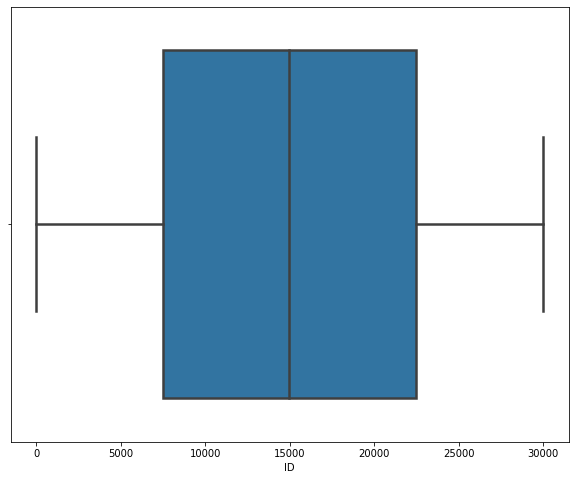

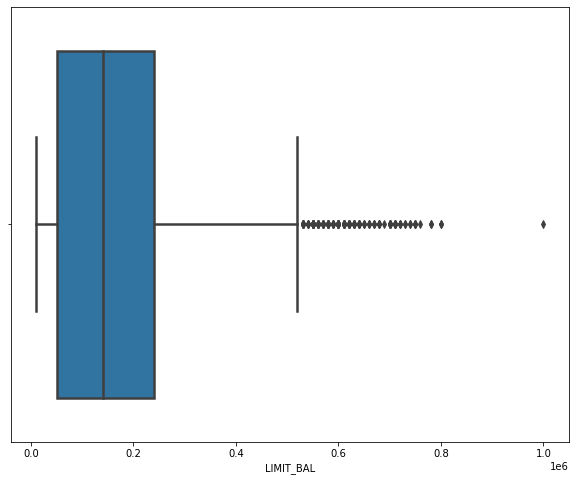

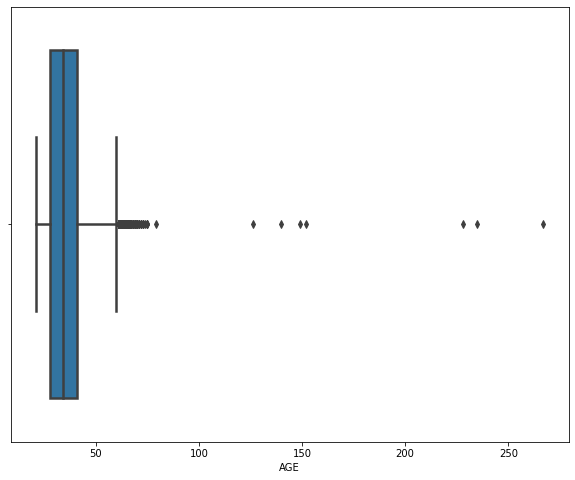

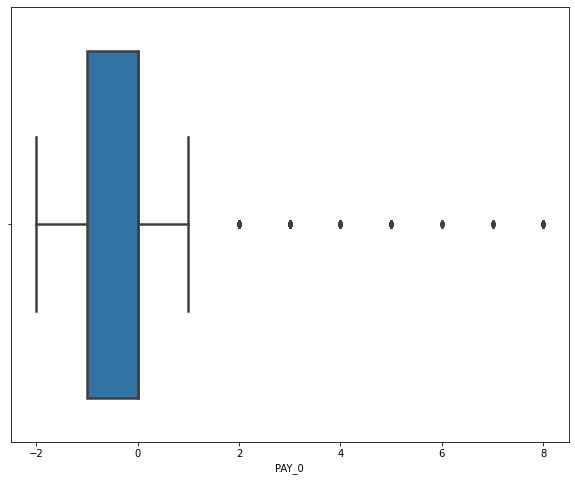

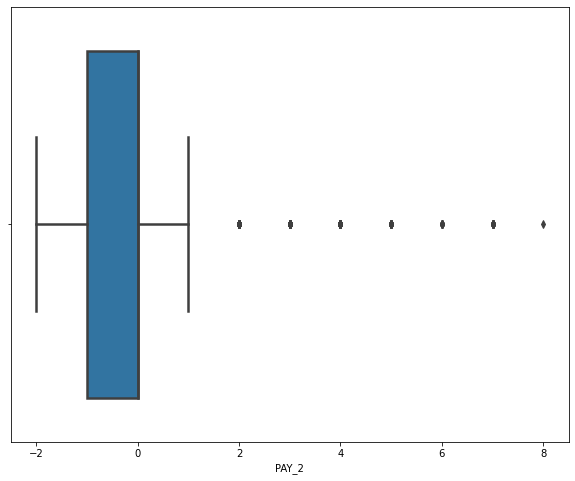

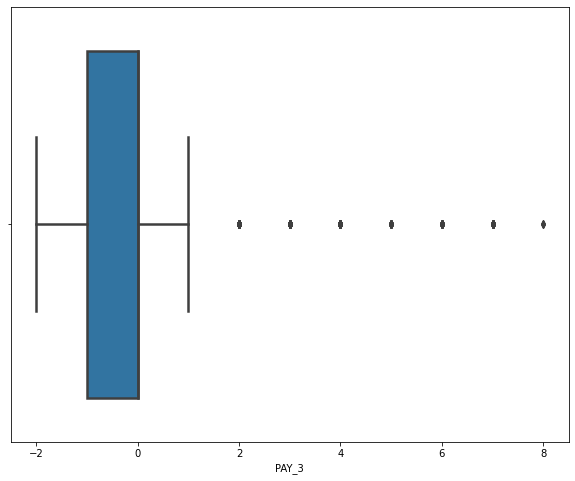

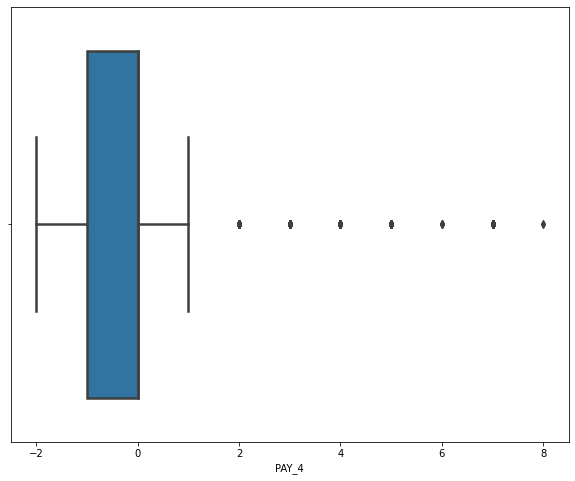

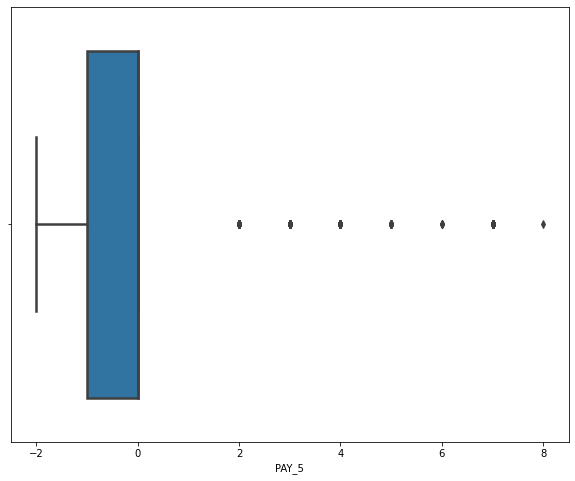

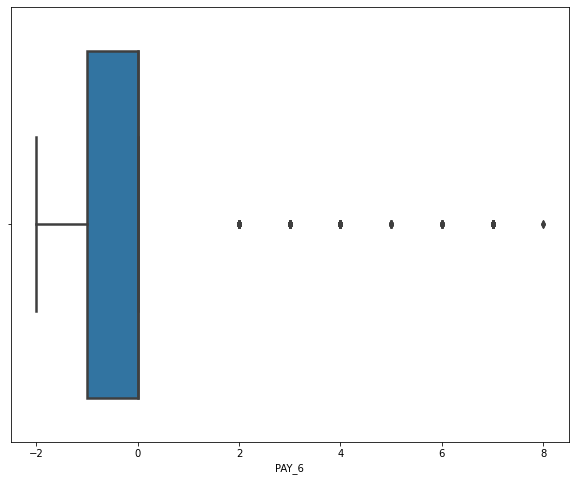

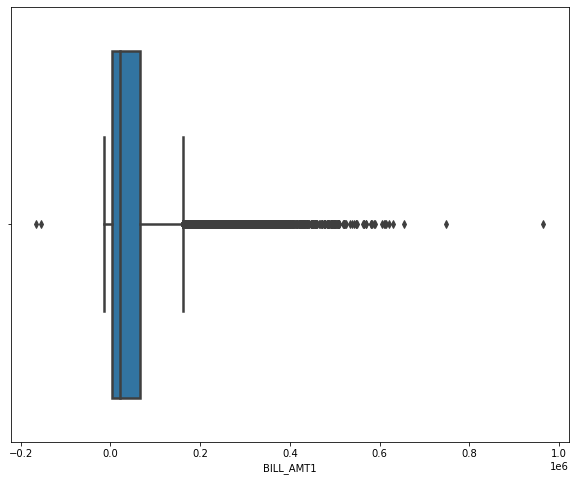

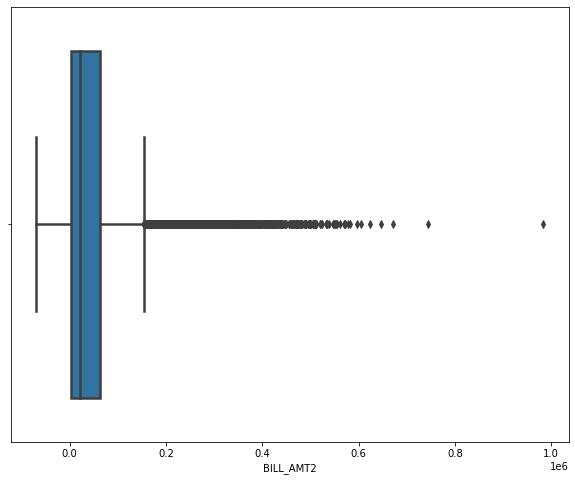

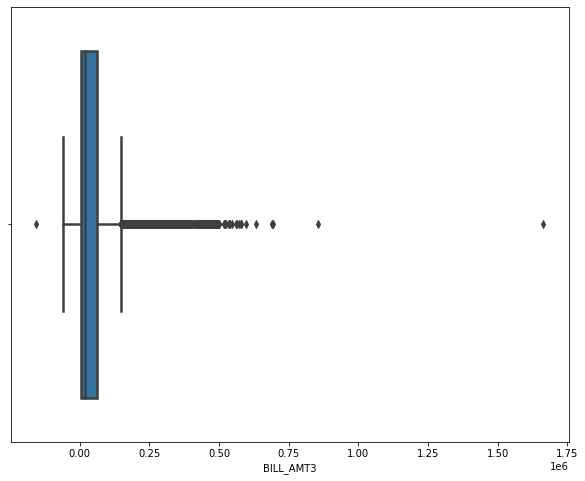

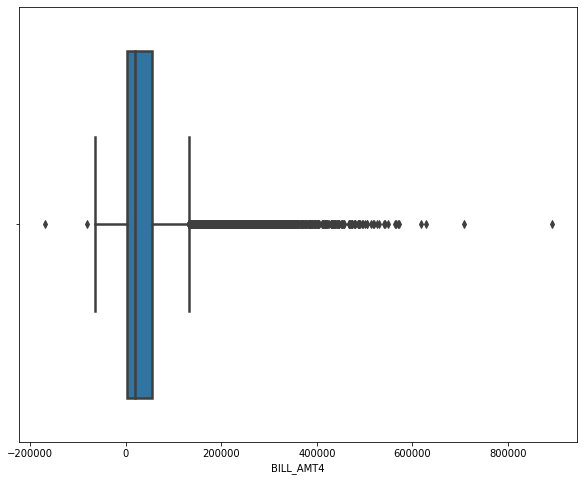

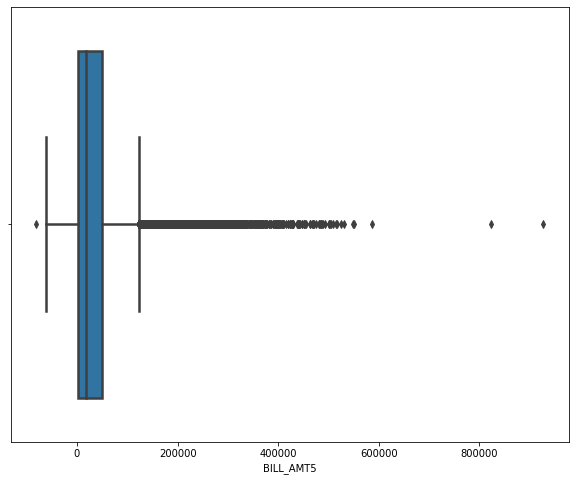

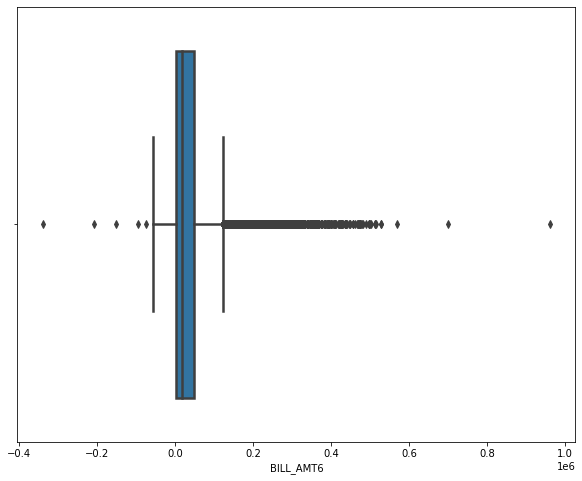

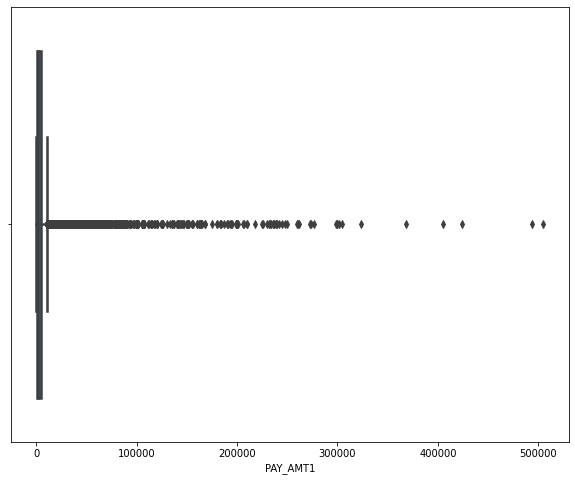

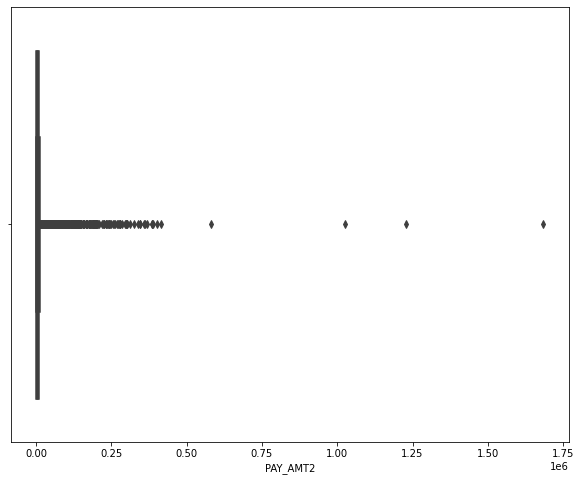

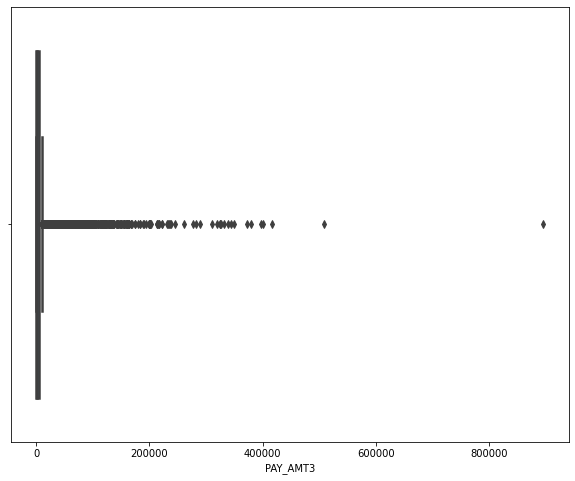

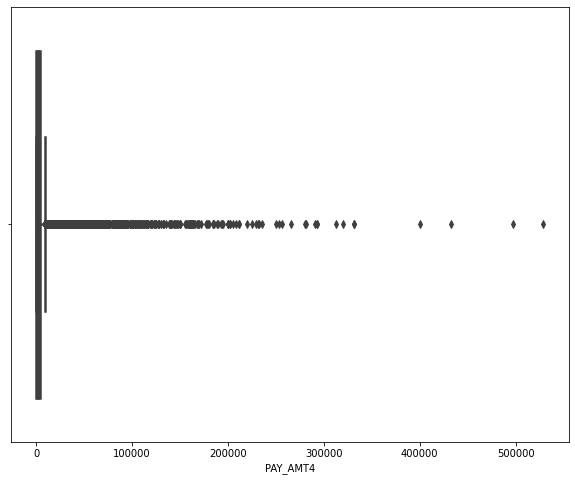

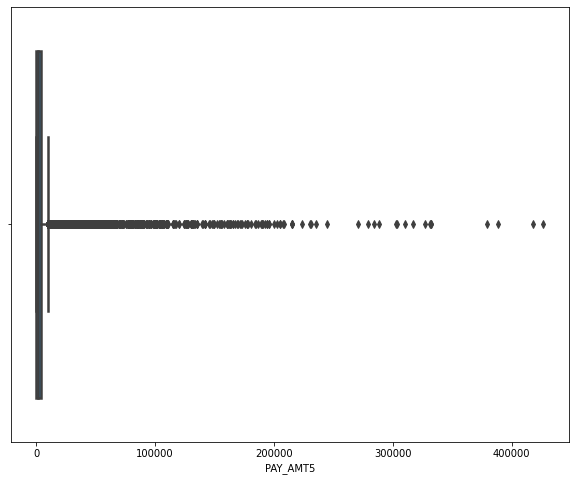

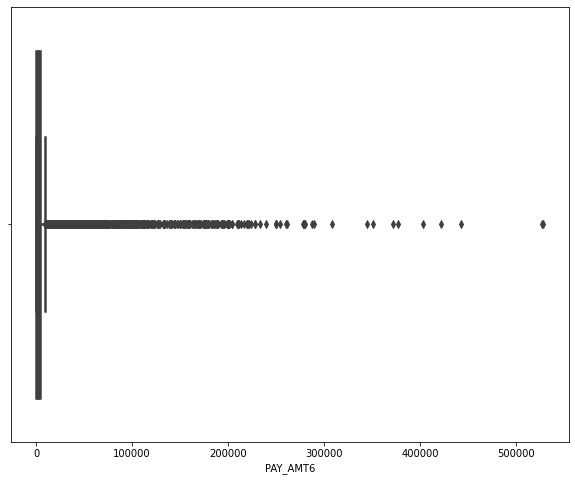

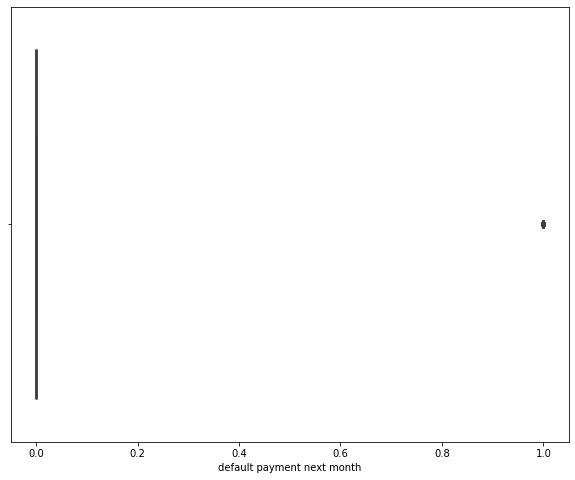

In [ ]:
#it seems wh have some outliers , let's check
import seaborn as sns
dfn_num = dfn.select_dtypes(exclude=['object'])
for column in dfn_num.columns:
  fig, ax = plt.subplots(figsize=(10,8))
  sns.boxplot(dfn_num[column], ax = ax, linewidth=2.5)

In [ ]:
#we really have some illogic outliers in Age (i will remove any age above 120),
#however another outliers on pay and bill are reasonable with provided card limits
df_out = dfn.query('AGE > 120')
print(df_out)
dfn.drop(df_out.index, inplace=True)
print(len(dfn.query('AGE > 120')))

          ID  LIMIT_BAL     SEX  ... PAY_AMT5 PAY_AMT6  default payment next month
4011    4012      50000    male  ...      323      312                           0
4116    4117      70000  female  ...     1000     2000                           1
5395    5396     490000  female  ...     4341     1061                           0
6963    6964     470000    male  ...     4200     5000                           1
7318    7319     360000  female  ...     5027   100017                           0
8940    8941     200000  female  ...    10000    10000                           0
29496  29497      80000    male  ...        7      118                           0

[7 rows x 25 columns]
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca6e42b38>,
      dtype=object)

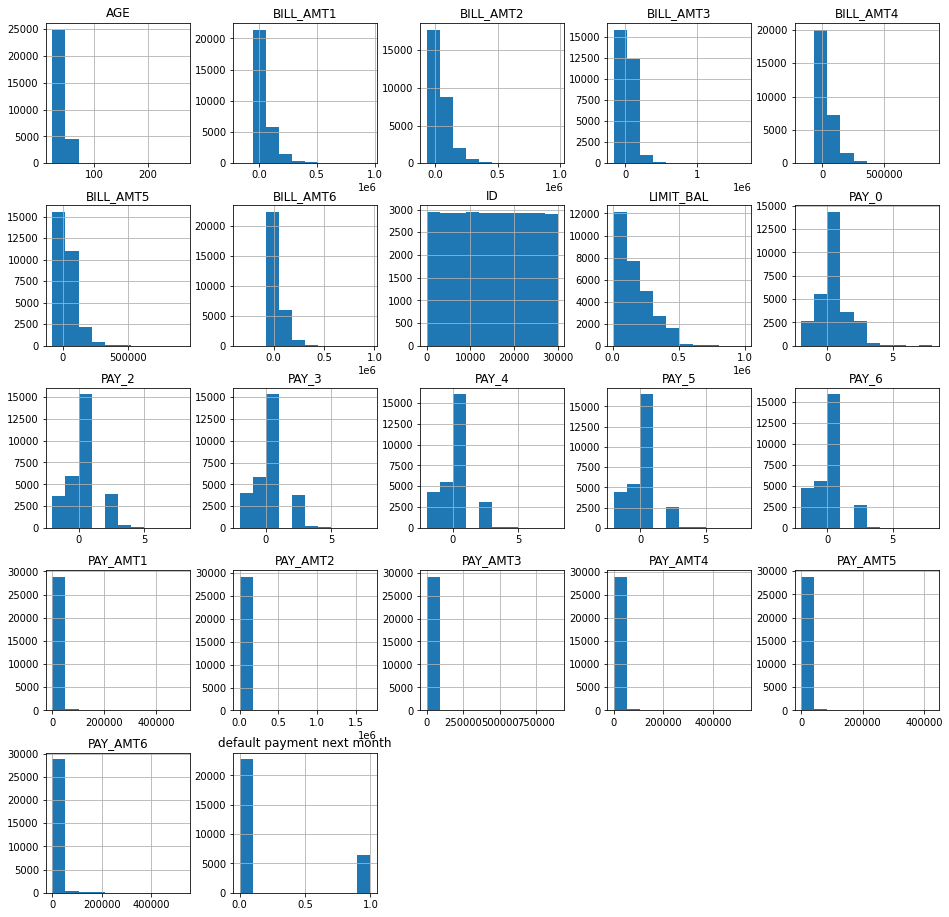

In [ ]:
#now we have a clean data set , let's do some analytics
dfn.hist(figsize=(16,16))

default payment next month,0,1
SEX,,
female,0.61,0.57
male,0.39,0.43


default payment next month,0,1
EDUCATION,,
graduate school,0.37,0.31
high school,0.16,0.18
others,0.01,0.00
university,0.46,0.50


default payment next month,0,1
MARRIAGE,,
married,0.45,0.49
single,0.55,0.51


LIMIT_BAL


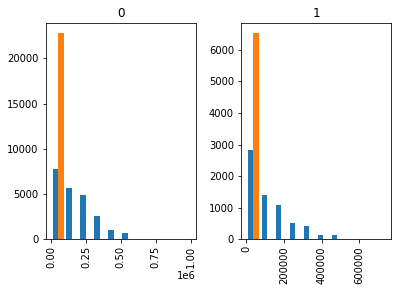

AGE


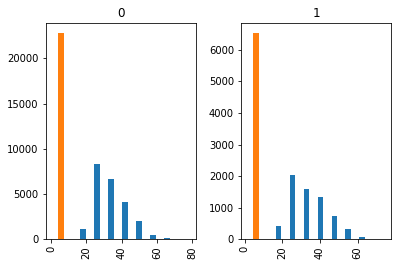

PAY_0


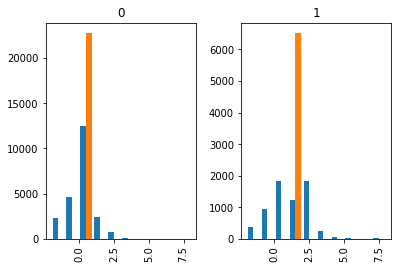

PAY_2


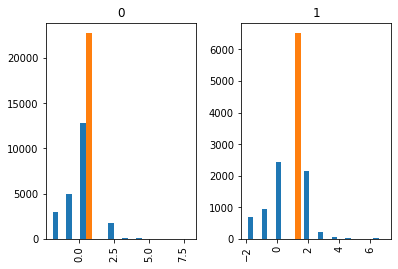

PAY_3


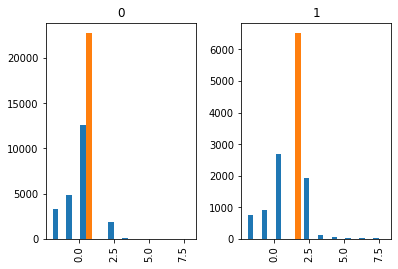

PAY_4


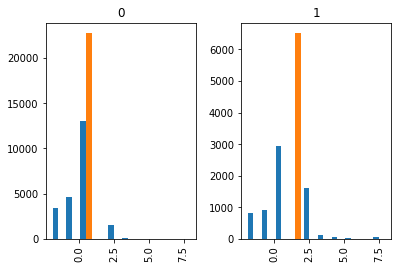

PAY_5


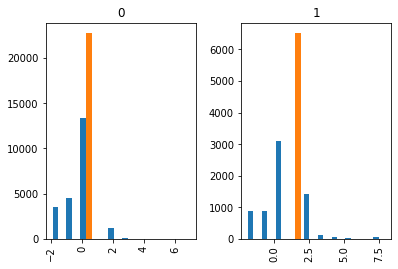

PAY_6


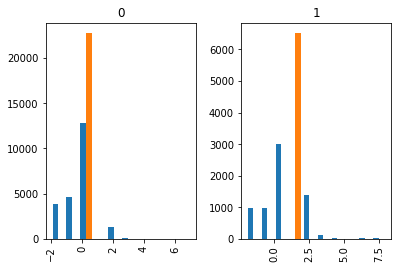

BILL_AMT1


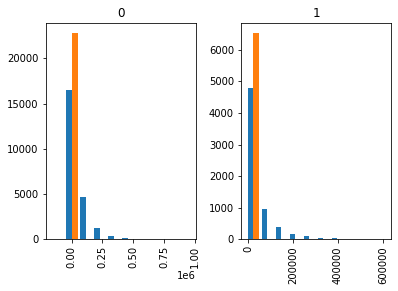

BILL_AMT2


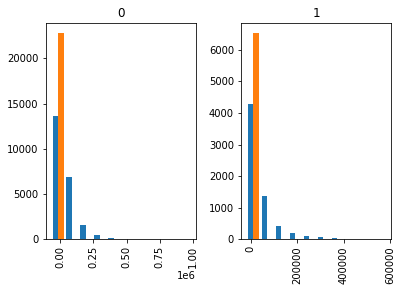

BILL_AMT3


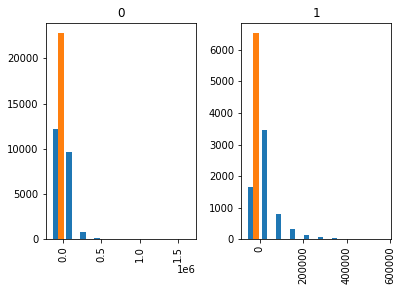

BILL_AMT4


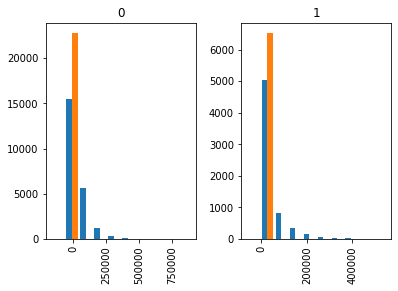

BILL_AMT5


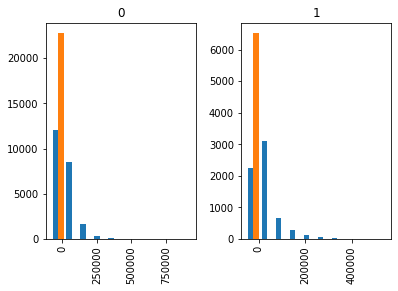

BILL_AMT6


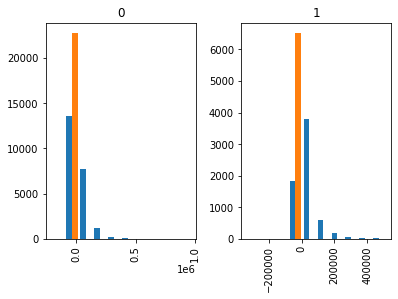

PAY_AMT1


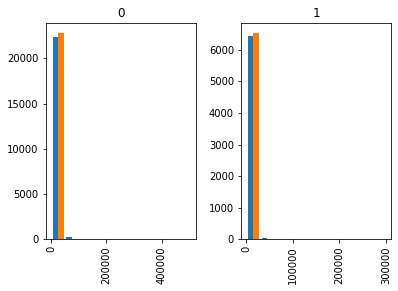

PAY_AMT2


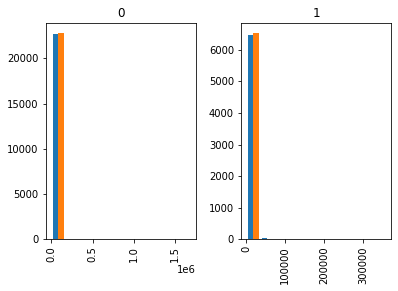

PAY_AMT3


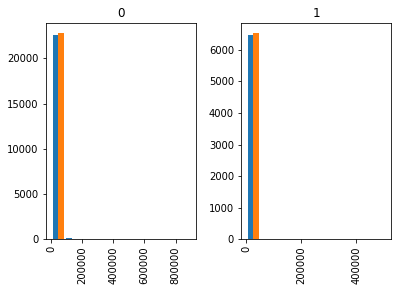

PAY_AMT4


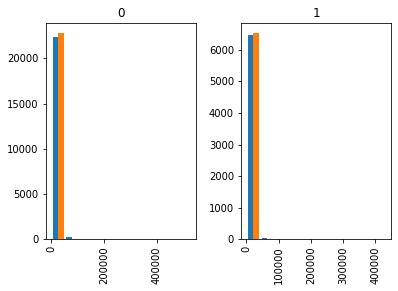

PAY_AMT5


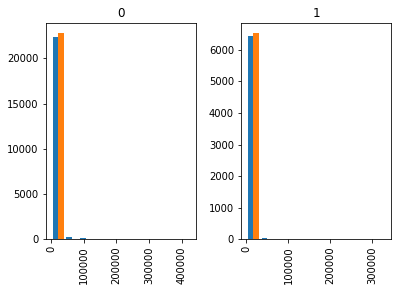

PAY_AMT6


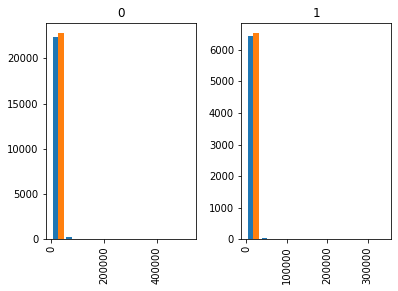

In [ ]:
#let's check the precentage of our two main classed versus some categories in data
for column in dfn.select_dtypes(include=['object']).columns:
    if column not in ('default payment next month', 'ID'):
        display(pd.crosstab(index=dfn[column], columns=dfn['default payment next month'], normalize='columns'))

for column in dfn.select_dtypes(exclude=['object']).columns:
  if column not in ('default payment next month', 'ID'):
    print(column)
    hist = dfn[[column, 'default payment next month']].hist(by='default payment next month')
    plt.show()

0    22757
1     6519
Name: default payment next month, dtype: int64
positive label ratio: 0.2864613086083403


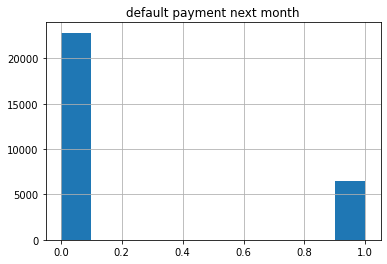

In [ ]:
#let's check the balance of target classes
df.hist(column= 'default payment next month')
print(dfn['default payment next month'].value_counts())
print('positive label ratio:',6519/22757)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.00,0.02,0.02,-0.03,-0.01,-0.02,-0.00,-0.02,-0.02,0.02,0.02,0.02,0.04,0.01,0.02,0.01,0.01,0.04,0.01,0.00,0.00,-0.01
LIMIT_BAL,0.02,1.00,0.15,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.28,0.28,0.28,0.29,0.29,0.29,0.20,0.18,0.22,0.21,0.22,0.22,-0.15
AGE,0.02,0.15,1.00,-0.04,-0.05,-0.06,-0.05,-0.06,-0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.03,-0.27,-0.04,1.00,0.67,0.58,0.54,0.51,0.48,0.19,0.19,0.18,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.33
PAY_2,-0.01,-0.30,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.24,0.24,0.22,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.02,-0.29,-0.06,0.58,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.23
PAY_4,-0.00,-0.27,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.25,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.21
PAY_5,-0.02,-0.25,-0.06,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.00,-0.00,0.01,-0.06,-0.03,-0.02,0.20
PAY_6,-0.02,-0.24,-0.05,0.48,0.58,0.63,0.72,0.82,1.00,0.21,0.23,0.24,0.27,0.29,0.29,-0.00,-0.01,0.00,0.02,-0.05,-0.03,0.19
BILL_AMT1,0.02,0.28,0.06,0.19,0.24,0.21,0.20,0.21,0.21,1.00,0.95,0.89,0.86,0.83,0.81,0.14,0.10,0.16,0.16,0.17,0.17,-0.02


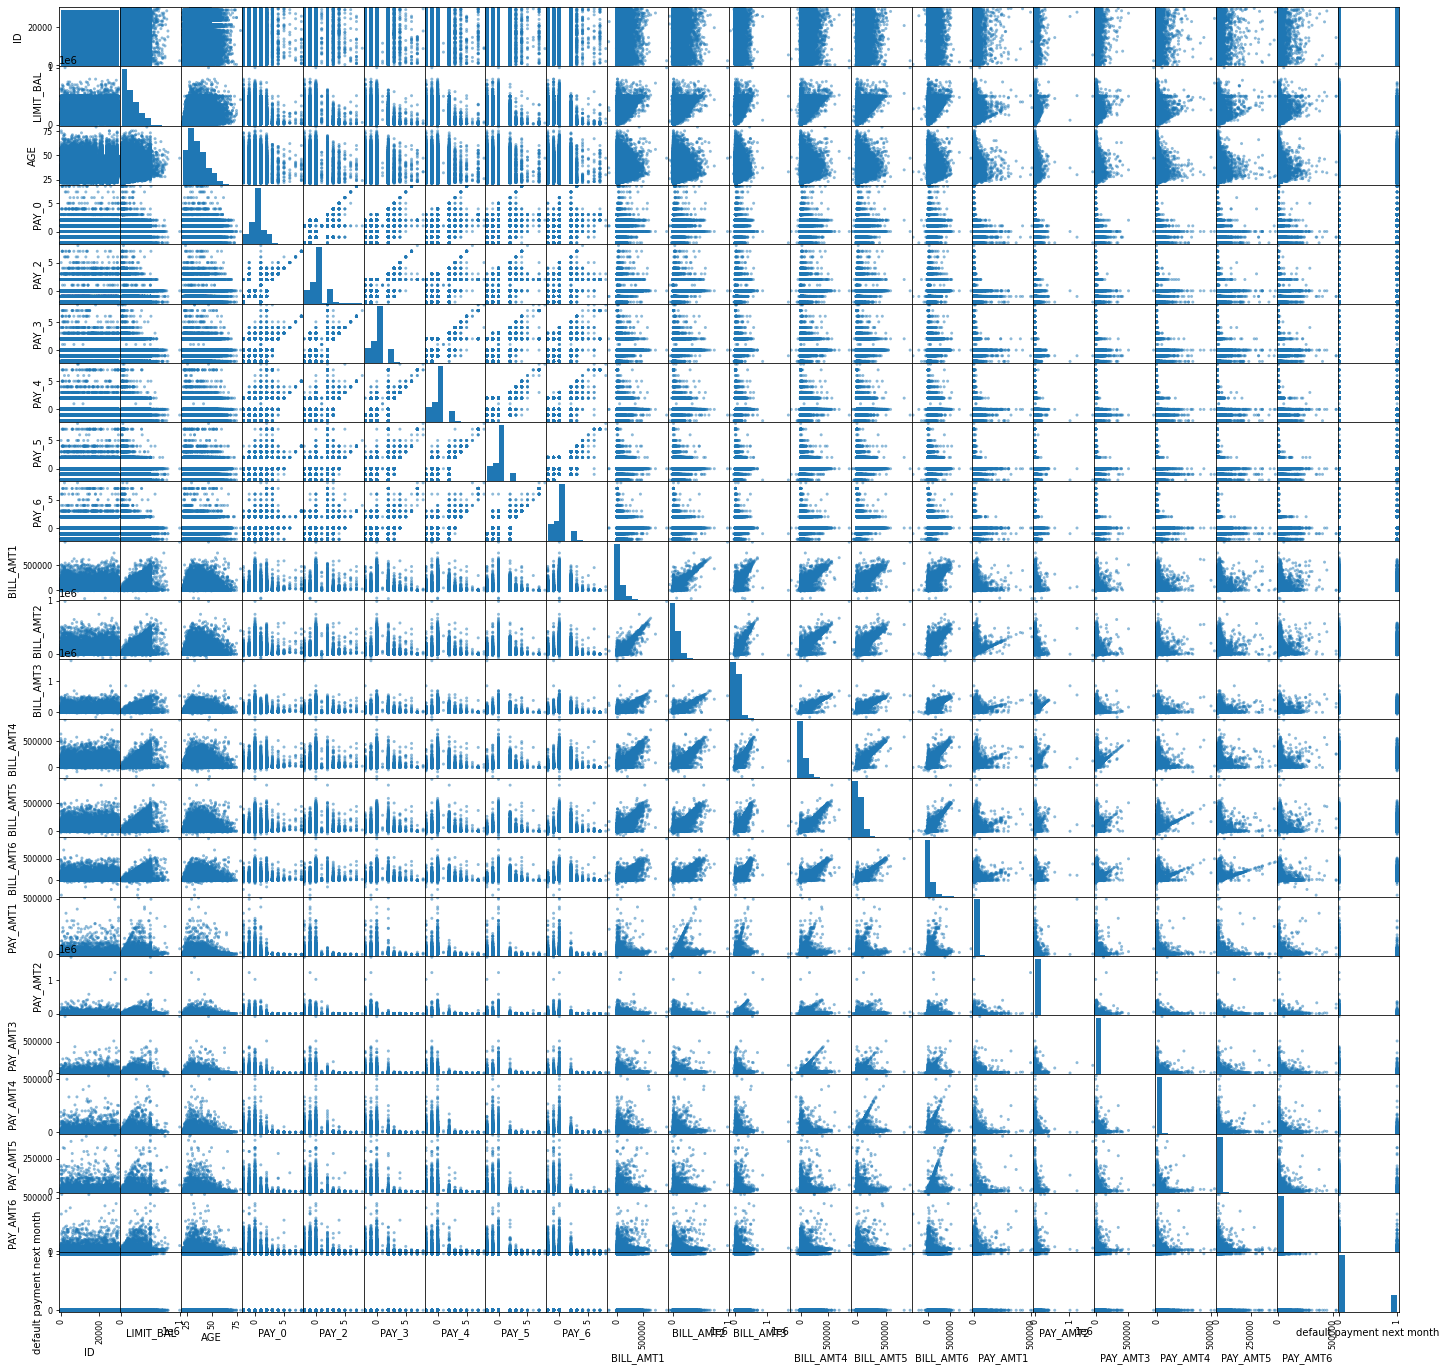

In [ ]:
display(dfn.corr())
pd.plotting.scatter_matrix(dfn, figsize=(24, 24))
plt.show()

Text(0.5, 1.0, 'dataset correlation')

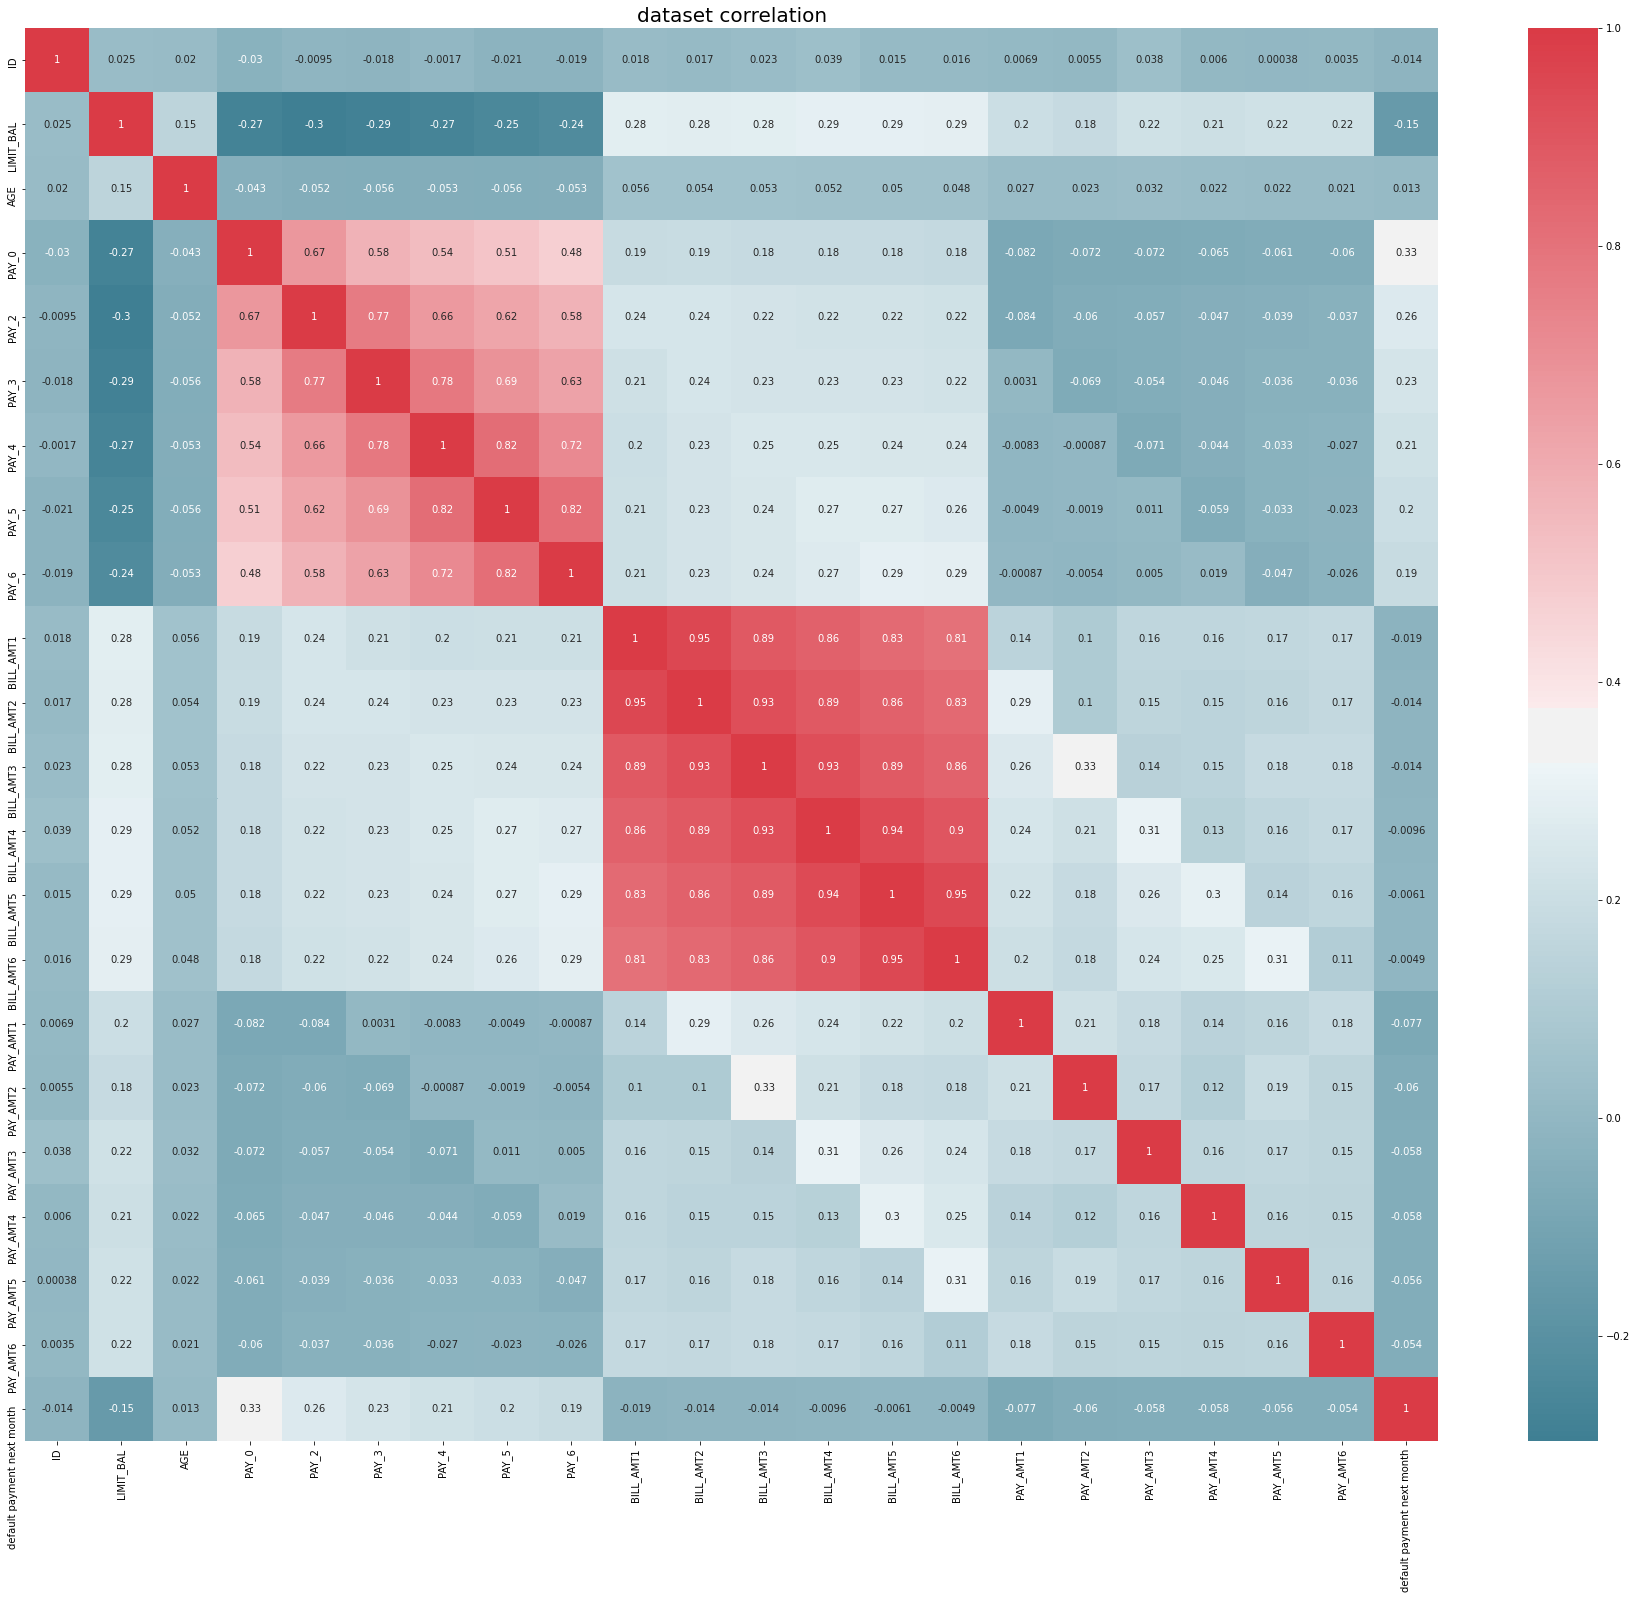

In [ ]:
#let's do some feature engineering and check the most correlated features
f, ax = plt.subplots(figsize=(32, 26))
corr = dfn.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

we can see that pay_4,pay5,pay6 are highly posisitve correlated ,
and all bill_amt features are highly positive correlated 

In [ ]:
numeric_features = ['AGE','LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_5','BILL_AMT2','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                    'PAY_AMT5','PAY_AMT6']

text_categorical_features =  ['SEX', 'EDUCATION', 'MARRIAGE']

non_useful_features = ['ID', 'PAY_4', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3','BILL_AMT4','BILL_AMT5'
,'BILL_AMT6']

label = ['y']

In [ ]:
#removing highly correlated features
df_final = dfn.drop(non_useful_features, axis =1)
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_5,BILL_AMT2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,married,24,2,2,-1,-2,3102,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,1725,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,14027,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,48233,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,5670,2000,36681,10000,9000,689,679,0


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_5,BILL_AMT2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.00,0.15,-0.27,-0.30,-0.29,-0.25,0.28,0.20,0.18,0.22,0.21,0.22,0.22,-0.15
AGE,0.15,1.00,-0.04,-0.05,-0.06,-0.06,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.27,-0.04,1.00,0.67,0.58,0.51,0.19,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.33
PAY_2,-0.30,-0.05,0.67,1.00,0.77,0.62,0.24,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.29,-0.06,0.58,0.77,1.00,0.69,0.24,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.23
PAY_5,-0.25,-0.06,0.51,0.62,0.69,1.00,0.23,-0.00,-0.00,0.01,-0.06,-0.03,-0.02,0.20
BILL_AMT2,0.28,0.05,0.19,0.24,0.24,0.23,1.00,0.29,0.10,0.15,0.15,0.16,0.17,-0.01
PAY_AMT1,0.20,0.03,-0.08,-0.08,0.00,-0.00,0.29,1.00,0.21,0.18,0.14,0.16,0.18,-0.08
PAY_AMT2,0.18,0.02,-0.07,-0.06,-0.07,-0.00,0.10,0.21,1.00,0.17,0.12,0.19,0.15,-0.06
PAY_AMT3,0.22,0.03,-0.07,-0.06,-0.05,0.01,0.15,0.18,0.17,1.00,0.16,0.17,0.15,-0.06


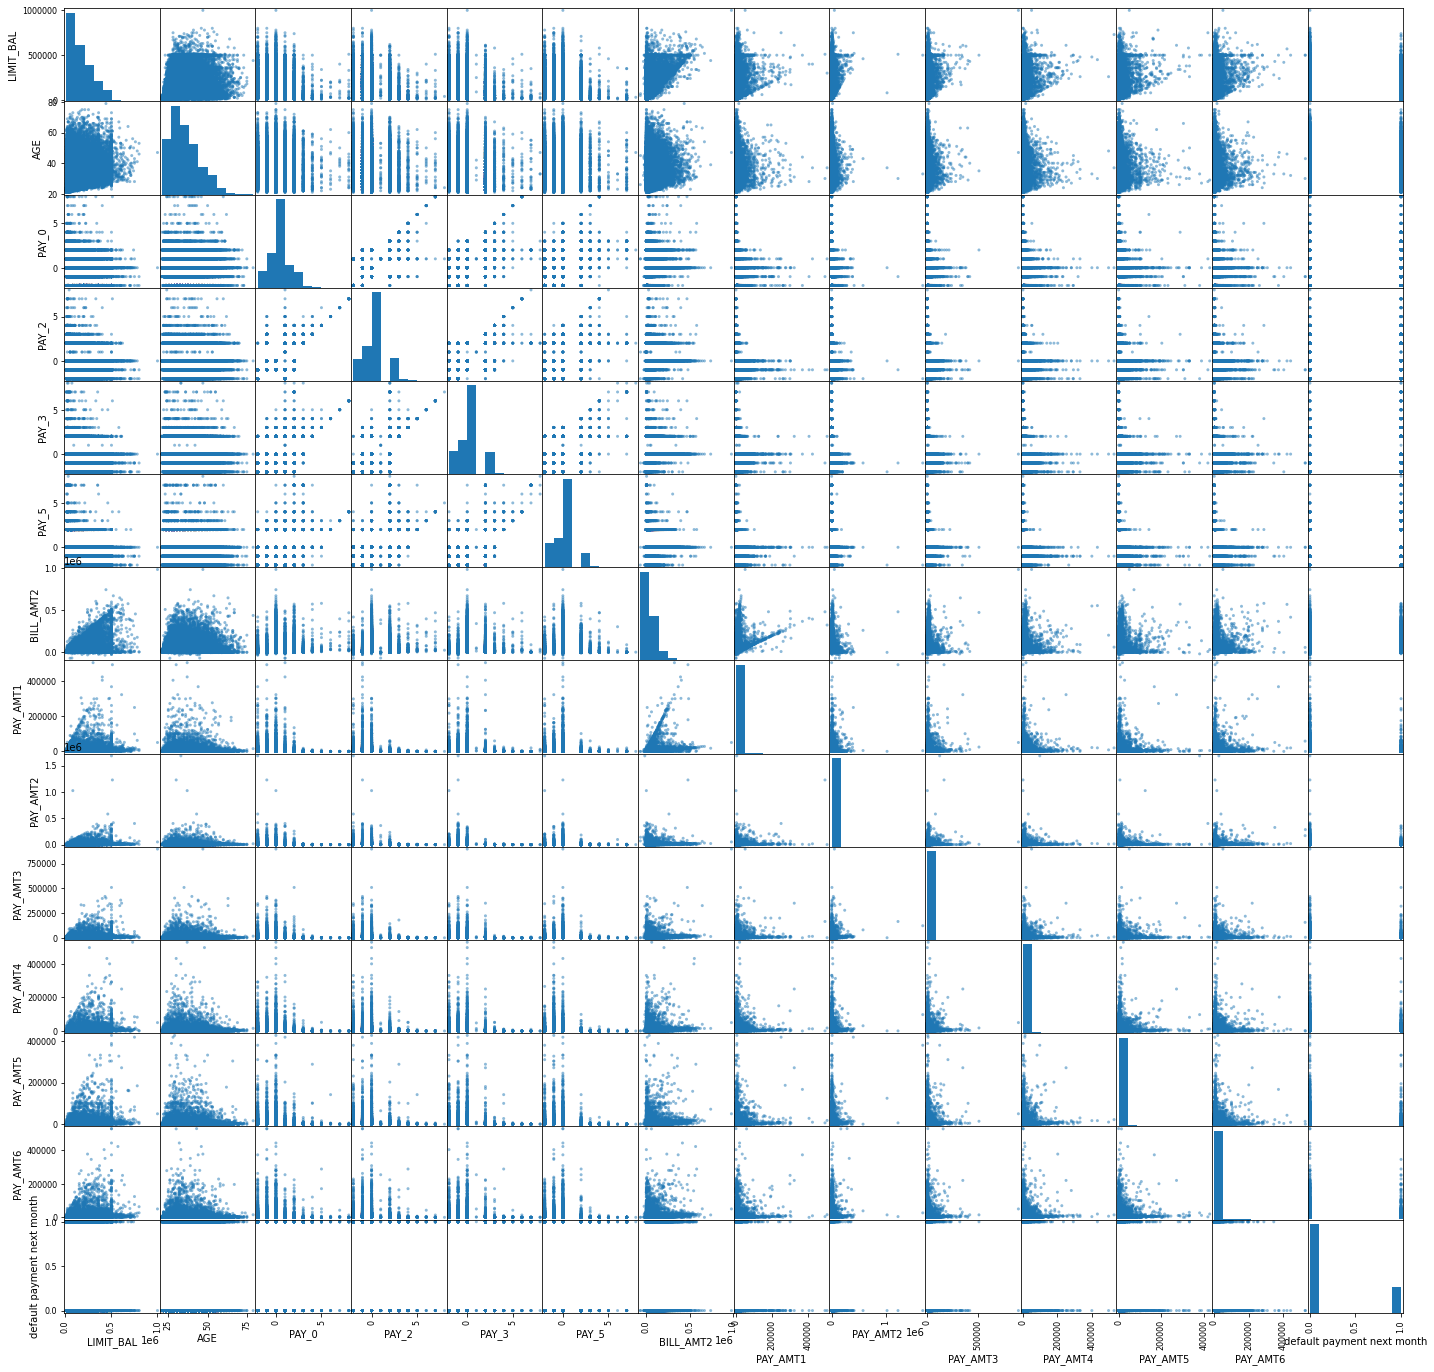

In [ ]:
#check the correlation matrix after removing heighest correlated features 
display(df_final.corr())
pd.plotting.scatter_matrix(df_final, figsize=(24, 24))
plt.show()

Text(0.5, 1.0, 'dataset correlation')

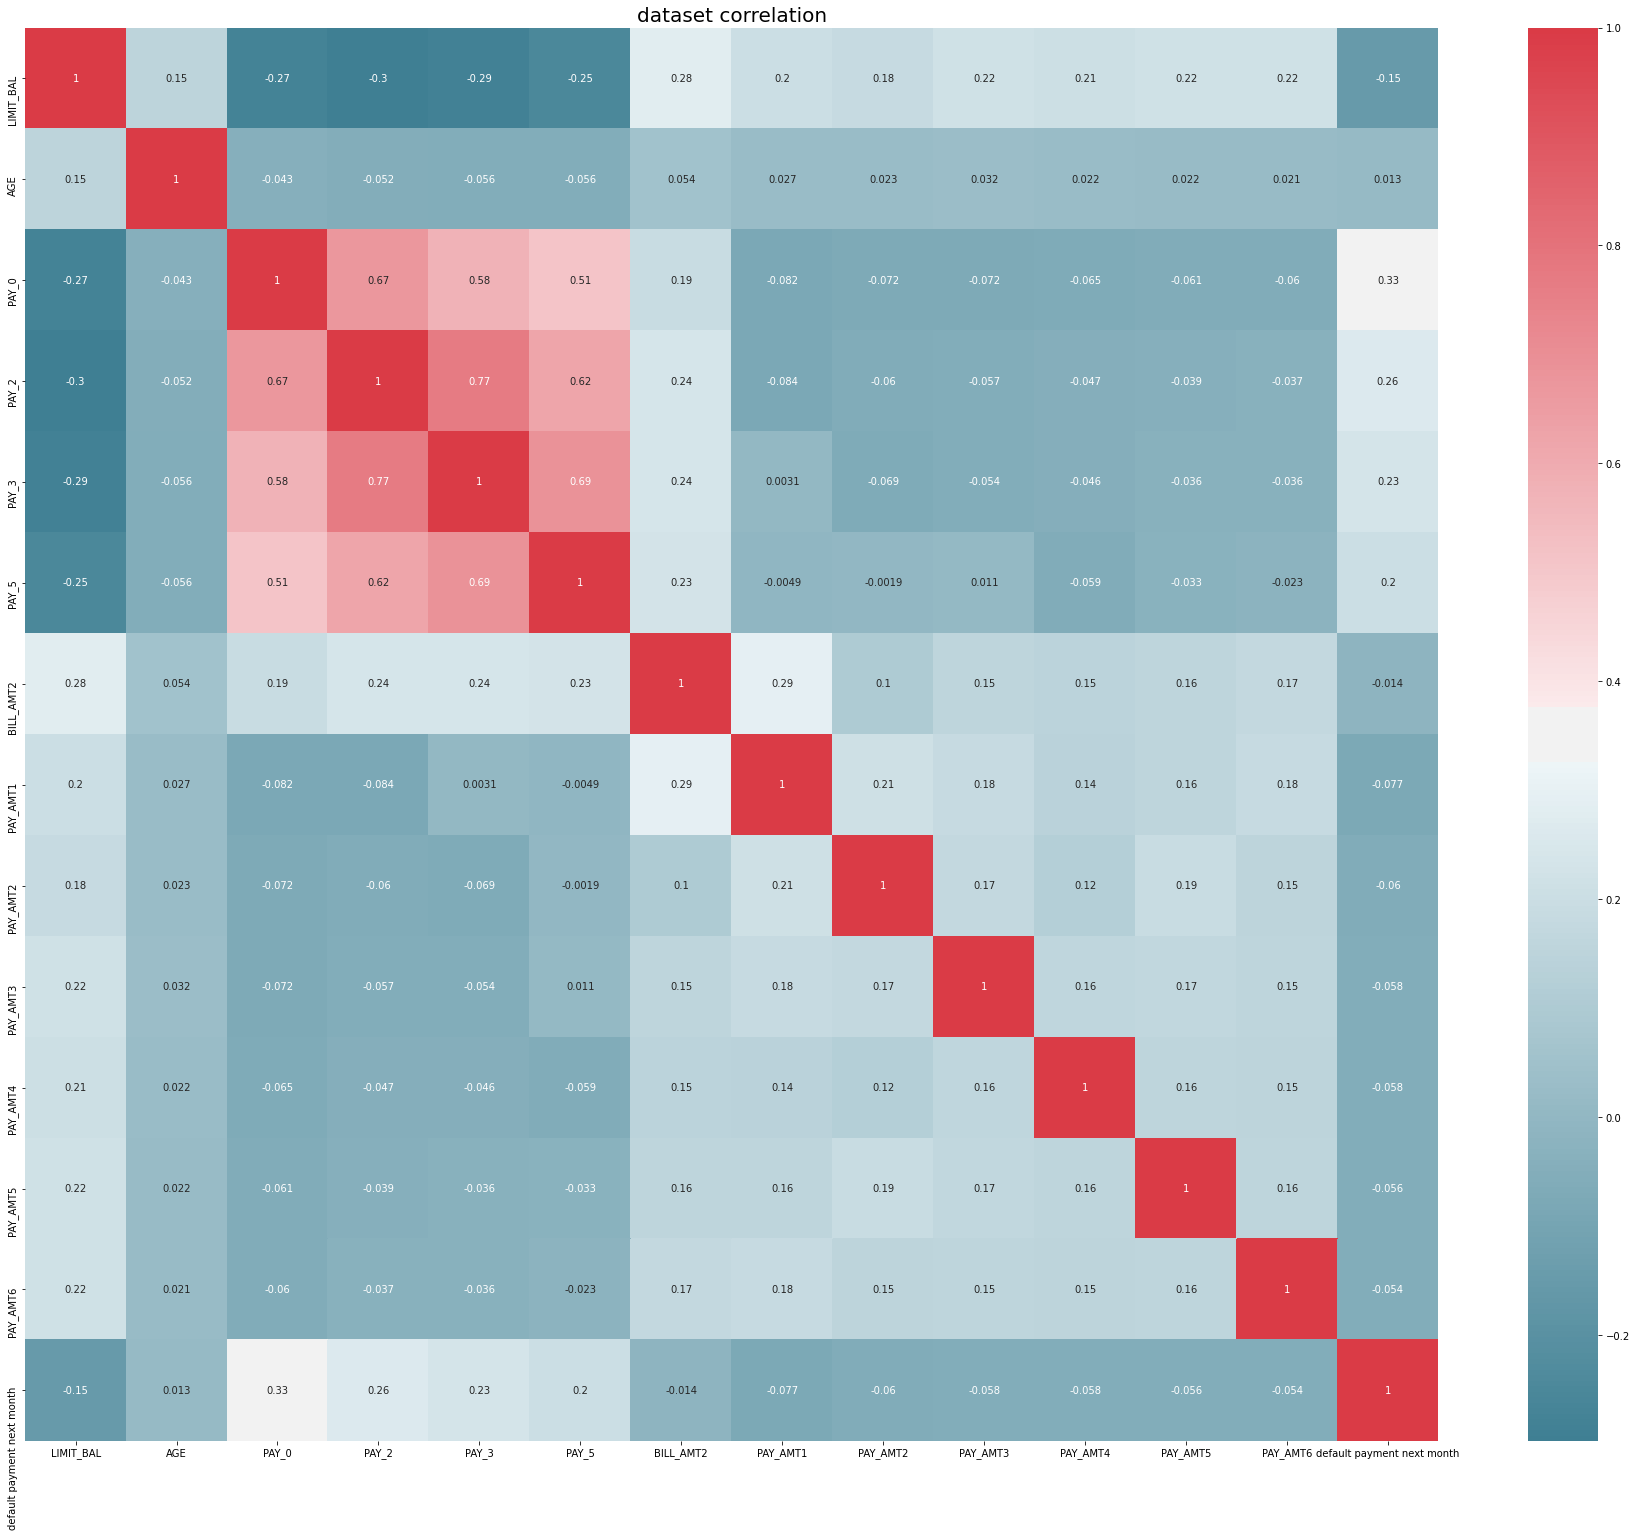

In [ ]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df_final.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [ ]:
df_final.reset_index(inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29276 entries, 0 to 29275
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     29276 non-null  int64 
 1   index                       29276 non-null  int64 
 2   LIMIT_BAL                   29276 non-null  int64 
 3   SEX                         29276 non-null  object
 4   EDUCATION                   29276 non-null  object
 5   MARRIAGE                    29276 non-null  object
 6   AGE                         29276 non-null  int64 
 7   PAY_0                       29276 non-null  int64 
 8   PAY_2                       29276 non-null  int64 
 9   PAY_3                       29276 non-null  int64 
 10  PAY_5                       29276 non-null  int64 
 11  BILL_AMT2                   29276 non-null  int64 
 12  PAY_AMT1                    29276 non-null  int64 
 13  PAY_AMT2                    29276 non-null  in

In [ ]:
#scaling our numeric features values is important as we have multiple data scales/units
from sklearn.preprocessing import MinMaxScaler

df_scale = df_final[numeric_features].astype(float)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scale), columns=df_scale.columns)
df_scaled.head()
data = df_scaled
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29276 entries, 0 to 29275
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        29276 non-null  float64
 1   LIMIT_BAL  29276 non-null  float64
 2   PAY_0      29276 non-null  float64
 3   PAY_2      29276 non-null  float64
 4   PAY_3      29276 non-null  float64
 5   PAY_5      29276 non-null  float64
 6   BILL_AMT2  29276 non-null  float64
 7   PAY_AMT1   29276 non-null  float64
 8   PAY_AMT2   29276 non-null  float64
 9   PAY_AMT3   29276 non-null  float64
 10  PAY_AMT4   29276 non-null  float64
 11  PAY_AMT5   29276 non-null  float64
 12  PAY_AMT6   29276 non-null  float64
dtypes: float64(13)
memory usage: 2.9 MB


In [ ]:
#creating the final dataframe to be trained on after
#onehot enbcoding categorical data and scaling the data (we have just scaled it in the above cell)
data_pre = df_final[text_categorical_features]
data_pre.head()
data_pre.info()
data_pre = pd.get_dummies(data_pre)
data_pre.head()
data_pre.info()
data = pd.concat([df_scaled, data_pre.reindex(data_pre.index)], axis=1)
data.head()
data.info()
data['y']= df_final['default payment next month']
# #data.rename(columns={'default payment next month':'y'},inplace=True)
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29276 entries, 0 to 29275
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        29276 non-null  object
 1   EDUCATION  29276 non-null  object
 2   MARRIAGE   29276 non-null  object
dtypes: object(3)
memory usage: 686.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29276 entries, 0 to 29275
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   SEX_female                 29276 non-null  uint8
 1   SEX_male                   29276 non-null  uint8
 2   EDUCATION_graduate school  29276 non-null  uint8
 3   EDUCATION_high school      29276 non-null  uint8
 4   EDUCATION_others           29276 non-null  uint8
 5   EDUCATION_university       29276 non-null  uint8
 6   MARRIAGE_married           29276 non-null  uint8
 7   MARRIAGE_single            29276 non-null  uint8
dtypes:

In [ ]:
#let's confirm the target class distribution in the new dataset
# data.info()
data.columns
data.y.value_counts()

0    22757
1     6519
Name: y, dtype: int64

In [ ]:
#let's split our data into training/testing/validation
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=True, random_state=23)

print('training count :',train_data.shape[0])
print('test count :',test_data.shape[0])
print('validation count :',val_data.shape[0])

training count : 23420
test count : 2928
validation count : 2928


In [ ]:
X_train = train_data.loc[:,'AGE':'MARRIAGE_single']
y_train = train_data['y']
X_val = val_data.loc[:,'AGE':'MARRIAGE_single']
y_val = val_data['y']

In [ ]:
X_train.shape
y_train[:5]

26774    0
28823    1
12071    1
19486    0
12293    1
Name: y, dtype: int64

In [ ]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#let's test multiple ml algorithms on our data using top classification metrics
#to choose the best performing one
dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        print(name)
        print(classification_report(y_val, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)

LogReg
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2249
           1       0.72      0.25      0.38       679

    accuracy                           0.80      2928
   macro avg       0.77      0.61      0.63      2928
weighted avg       0.79      0.80      0.77      2928

RF
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2249
           1       0.67      0.41      0.51       679

    accuracy                           0.82      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.80      0.82      0.80      2928

KNN
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2249
           1       0.57      0.36      0.44       679

    accuracy                           0.79      2928
   macro avg       0.70      0.64      0.65      2928
weighted avg       0.77      0.79      0.77      2928

XGB
 

In [ ]:
#let's visualize the algorithms performance metrics

bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

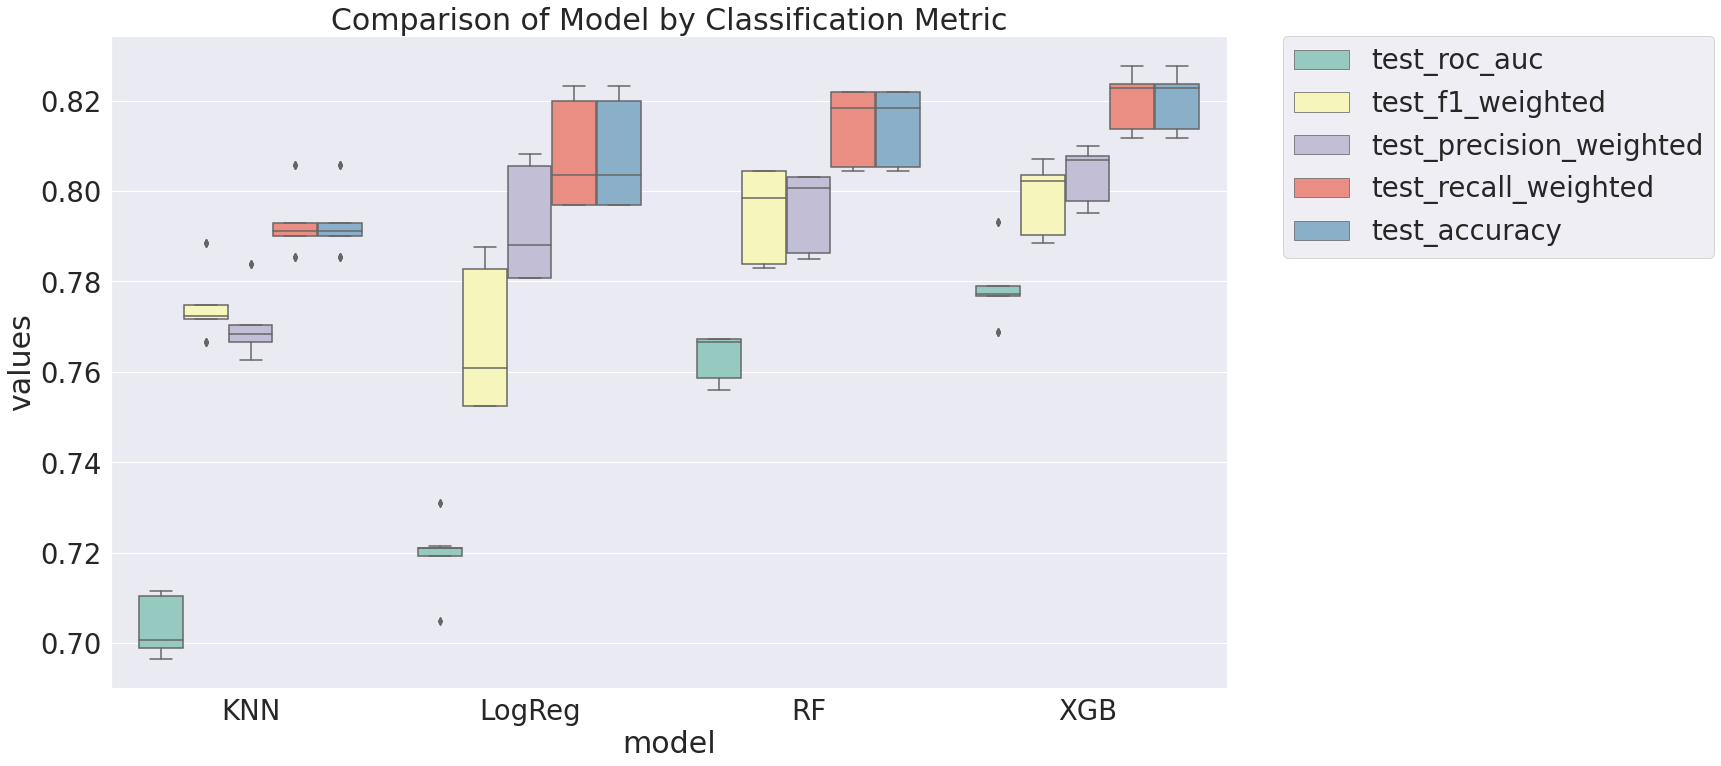

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

from the 
above analysis , it shows that xgb is the best algorithm choice in our case 